In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("train.csv")
df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000


In [22]:
X=df[['TotalBsmtSF','GrLivArea','GarageArea','OverallQual','GarageCars','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
Y=df['SalePrice']
#Feature scaling
#normalising X and Y values
Y=np.array((Y-Y.mean())/Y.std()) #Zscore normalisation
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0) 

In [23]:
#Random values initialised for our parameters w1,w2,w3(weights),b
import random
def initialize(dim):
    b=random.random()
    w=np.random.rand(dim)#random.rand() creates an array of specified shape and fills it with random numbers lying btw 0 and 1
    return b,w
b,w=initialize(10)
print("Bias: ",b,"Weights: ",w)

Bias:  0.16151871867972145 Weights:  [0.86190062 0.71205981 0.33540117 0.51464266 0.15529795 0.10272232
 0.13177839 0.02462727 0.68513709 0.99481521]


we now need to predict the output y hat

In [24]:
def predict_y(b,w,X):
    return b+np.dot(X,w) #yhat=w1_x1+w2_x2+w3_x3+b

Y_hat=predict_y(b,w,X)
Y_hat[0:5]

    

array([-2.2774491 , -2.43469891, -1.10418934,  9.78031279,  1.61625093])

In [25]:
Y[0:5]


array([ 0.03475576, -0.21560915, -0.6412295 ,  4.67902491, -0.0653902 ])

# Cost Function

In [26]:
def cost_J(Y,Y_hat):
    sum=0
    for i in range(len(Y)):
        sum=sum+((Y_hat[i]-Y[i])*(Y_hat[i]-Y[i]))
    cost=sum/(2*len(Y))
    return cost

cost_J(Y,Y_hat)

3.2175602640984136

# Gradient Descent

In [27]:
def update(X,Y,Y_hat,b,w,a): #a is learning rate
   
    dj_db=(np.sum(Y_hat-Y))/len(Y)
    dj_dw=(np.dot((Y_hat-Y),X))/len(Y)
     #simultaneous update
    new_b=b-a*dj_db
    new_w=w-a*dj_dw
    return new_b,new_w
print("initial values  bias: ",b,"weight: ",w)

#b,w=update(X,Y,Y_hat,b,w,0.1)
#Y_hat=predict_y(b,w,X) #y changes since w and b changed
#print("After first update -Bias: ",b,"weights: ",w)
#cost_J(Y,Y_hat)

    

initial values  bias:  0.16151871867972145 weight:  [0.86190062 0.71205981 0.33540117 0.51464266 0.15529795 0.10272232
 0.13177839 0.02462727 0.68513709 0.99481521]


In [28]:
j=[]
List=[]
for i in range(800):
    b,w=update(X,Y,Y_hat,b,w,0.1)
    Y_hat=predict_y(b,w,X) 
    #print(cost_J(Y,Y_hat))
    j.append(cost_J(Y,Y_hat))
    List.append(i)


In [29]:

def gradient_descent(X,Y,a,niterations):
    b,w=initialize(X.shape[1])#X.shape[1] gives the number of rows,i.e 2nd dimension, here 3(we've taken 3 attributes)
    #creating a dataframe with cost function and number of iterations, to plot graph
    iter_=0
    df_graph=pd.DataFrame(columns=['iteration','cost'])
    number1=0
    
    for i in range(niterations):
        Y_hat=predict_y(b,w,X) 
        new_cost=cost_J(Y,Y_hat)
        b_old=b
        w_old=w
        b,w=update(X,Y,Y_hat,b_old,w_old,a)
        
        if(iter_%5==0):
            df_graph.loc[number1]=[iter_,new_cost]
            number1+=1
            
        iter_+=1
            
    print("Final estimated value of b : ",b)
    print("Final estimated value of w : ",w)

    return df_graph,b,w

    
    
df_graph,b,w=gradient_descent(X,Y,a=0.1,niterations=200)
     
        

Final estimated value of b :  4.3027338510722e-10
Final estimated value of w :  [ 0.08055039  0.29696896  0.01938175  0.34648111  0.1314684   0.09506063
 -0.04191782  0.02479175  0.09092121  0.07511873]


In [30]:
df_graph[0:15]

,iteration,cost
0,0.0,2.698363
1,5.0,0.309269
2,10.0,0.219403
3,15.0,0.180497
4,20.0,0.161172
5,25.0,0.150247
6,30.0,0.143322
7,35.0,0.138532
8,40.0,0.135011
9,45.0,0.132313


# Plotting graph of J vs Number of iterations

Text(0, 0.5, 'Cost Function J')

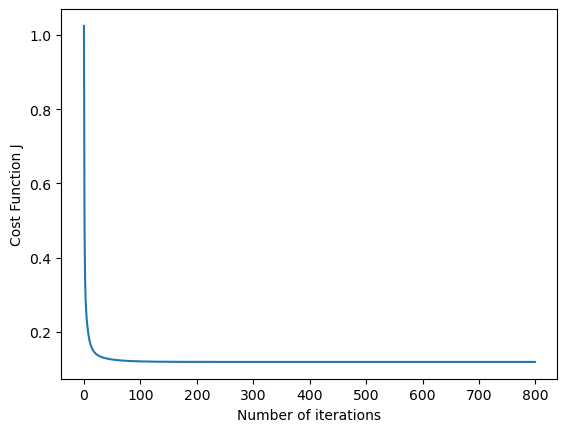

In [31]:
#graph will help us choose the right alpha and gives an idea about convergence
%matplotlib inline
plt.plot(List,j)
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function J")

Final estimated value of b :  0.035545725384329215
Final estimated value of w :  [ 0.15671119  0.31239624  0.39376586  0.03659443 -0.20201774 -0.02988402
  0.07871291  0.11613384  0.2572891   0.06762835]
Final estimated value of b :  4.0390738158313804e-10
Final estimated value of w :  [ 0.09073164  0.33060207  0.09355747  0.33337687  0.05627558  0.06963171
 -0.0372812   0.00441637  0.09893676  0.07669369]
Final estimated value of b :  0.001247452053371996
Final estimated value of w :  [ 0.27513617  0.38566715 -0.06770408  0.21612294  0.23944186 -0.07520836
 -0.00872894 -0.00951473  0.06679859  0.10977189]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

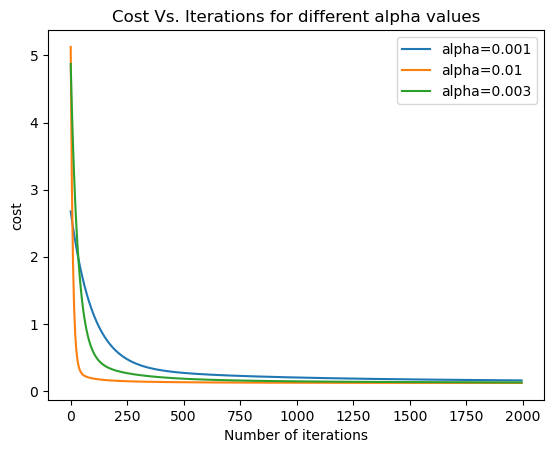

In [32]:
df1,b,w=gradient_descent(X,Y,a=0.001,niterations=2000)
df2,b,w=gradient_descent(X,Y,a=0.01,niterations=2000)
df3,b,w=gradient_descent(X,Y,a=0.003,niterations=2000)
#df4,b,w=gradient_descent(X,Y,a=0.1,niterations=100)
#df5,b,w=gradient_descent(X,Y,a=0.03,niterations=100)

plt.plot(df1['iteration'],df1['cost'],label="alpha=0.001")
plt.plot(df2['iteration'],df2['cost'],label="alpha=0.01")
plt.plot(df3['iteration'],df3['cost'],label="alpha=0.003")
#plt.plot(df4['iteration'],df4['cost'],label="alpha=0.1")
#plt.plot(df5['iteration'],df5['cost'],label="alpha=0.03")

plt.legend()
plt.ylabel("cost")
plt.xlabel("Number of iterations")
plt.title("Cost Vs. Iterations for different alpha values")

Converges is reached after different number of iterations for most cases of alpha. I will be taking learning rate as 0.003 for the model.

In [33]:
df1,b,w=gradient_descent(X,Y,a=0.003,niterations=2000)
#we now have values of weights and b
#plotting regression line


Final estimated value of b :  0.0008404544902590852
Final estimated value of w :  [ 0.05888227  0.22571822  0.09261029  0.28668666  0.06511651  0.13663453
 -0.03931236  0.10320547  0.13789737  0.08082593]


In [34]:
df_2=pd.read_csv("test.csv")

In [35]:

df_2.head()


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000


In [36]:
x=df_2[['TotalBsmtSF','GrLivArea','GarageArea','OverallQual','GarageCars','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
y=df_2['SalePrice']
#Feature scaling
#normalising X and Y values
y=np.array((y-y.mean())/y.std()) #Zscore normalisation
x=x.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0) 

In [37]:
df1,b,w=gradient_descent(X,Y,a=0.003,niterations=2000) #we will take w and b values(regression line) as per train.csv
y_hat=predict_y(b,w,x)
def r2(y_hat, y):
    rss = np.sum((y_hat - y) ** 2)#sum of squares of residuals
    tss = np.sum((y-y.mean()) ** 2)#total sum of squares
    
    r2 = 1 - (rss / tss)
    return r2
print("\nValue of r²: ",r2(y_hat, y))


Final estimated value of b :  0.0014123660988962024
Final estimated value of w :  [ 0.16872999  0.37886527  0.10548997  0.27073331  0.06775016 -0.00370515
 -0.02513311 -0.02177838  0.06098534  0.11992602]

Value of r²:  0.8159849334573024


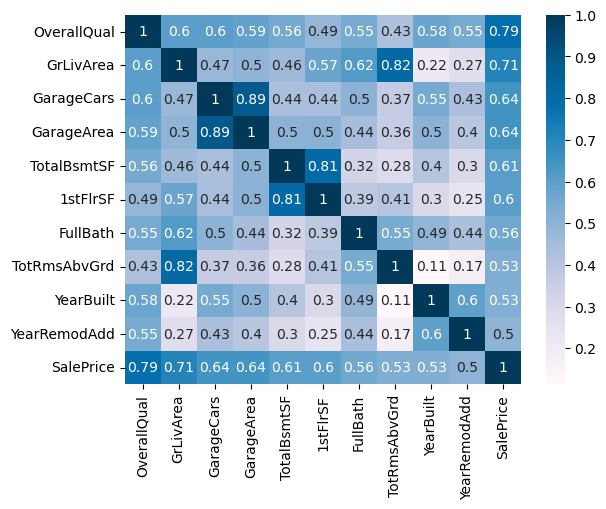

In [38]:
from seaborn import heatmap

sns.heatmap(df.corr(), cmap='PuBu', annot=True)#annot writes data value in each cell
#plt.savefig("heatmap") 
plt.show()